In [2]:
import os
os.chdir("/home/lishi/workspace/MAAF/")

In [40]:
from datasets.fashioniq import FashionIQ
val_dataset = FashionIQ(path="/home/lishi/workspace/fashion_iq/start_kit/data", split="val")

0  files not found in  val


In [65]:

import random

query = val_dataset.test_queries[random.randint(0, len(val_dataset.test_queries))]
query

{'source_img_id': 7420,
 'target_img_id': 6433,
 'target_caption': 6433,
 'mod': {'str': 'is a large white and black plaid inadditiontothat is lighter with larger plaid pattern'},
 'category': 'shirt'}

Populating the interactive namespace from numpy and matplotlib


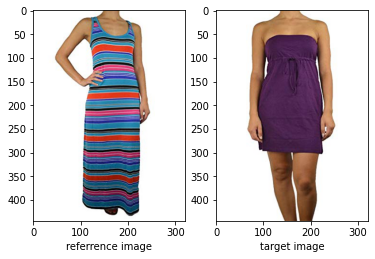

modification text:  Is shorter and more purple inadditiontothat is strapless and purple


In [51]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

id2asin = val_dataset.id2asin
ref_asin = id2asin[query["source_img_id"]]
tgt_asin = id2asin[query["target_img_id"]]

ref_img_path = os.path.join(val_dataset.img_path, "images", ref_asin + ".jpg")
tgt_img_path = os.path.join(val_dataset.img_path, "images", tgt_asin + ".jpg")

fig, axs = plt.subplots(ncols=2, nrows=1)

ref_img = mpimg.imread(ref_img_path)
tgt_img = mpimg.imread(tgt_img_path)

axs[0].imshow(ref_img)
axs[0].set(xlabel='referrence image')

axs[1].imshow(tgt_img)
axs[1].set(xlabel='target image')

plt.show()

print("modification text: ", query["mod"]["str"])

In [56]:
import json

preds_path = "/home/lishi/workspace/MAAF/experiments/fashioniq/sequence_concat_attention/val"
preds = []

for file in os.listdir(preds_path):
    with open(os.path.join(preds_path,file)) as f:
        preds += json.load(f)

In [66]:
pred

{'candidate': 'B00A7HBMEO',
 'ranking': ['B00AZ57EYK',
  'B00BJ98ID2',
  'B00CFMNT0O',
  'B00B8XYZV8',
  'B00A00H7N8',
  'B004HHNMRK',
  'B0064XXI42',
  'B007TN1W6M',
  'B00DSEFH7G',
  'B0096I9E54',
  'B00BFA8AK6',
  'B00522PGV4',
  'B0013WQ03U',
  'B00DEPW47K',
  'B00BGVR06Y',
  'B006NUXY9A',
  'B00B1XHI1E',
  'B0044WVF36',
  'B003XRJGQG',
  'B007POA5NG',
  'B00C4YWU8K',
  'B00DDYQOZA',
  'B00CO951MW',
  'B007NE48KE',
  'B008PYJGRG',
  'B009YJS2IK',
  'B009K7F0L8',
  'B00D2EVETW',
  'B00BE2MD3U',
  'B00BCT0ZM6',
  'B00BR5RG3G',
  'B008JGAI0E',
  'B00BFZQSUK',
  'B00B9L186O',
  'B00BBI9AYC',
  'B00D9JWW1O',
  'B008AW6A5O',
  'B00AEYP3WC',
  'B0092SC112',
  'B00B8QSUCA',
  'B007W4SK04',
  'B00DZ0K2RS',
  'B00BGVUEB2',
  'B008BOJ2TM',
  'B00AZ81CD6',
  'B006MJNKAK',
  'B00C4YP0YQ',
  'B008UD2RBO',
  'B00CX8GJUC',
  'B009XTUSXI',
  'B008MC6KIE',
  'B001PTGOA0',
  'B007SMNWSU',
  'B00AYGYY70',
  'B0079MB7ZE',
  'B006ZQ9284',
  'B007E6A50S',
  'B007NG42KS',
  'B0060FQ73I',
  'B00DJ7G4Q0',
 

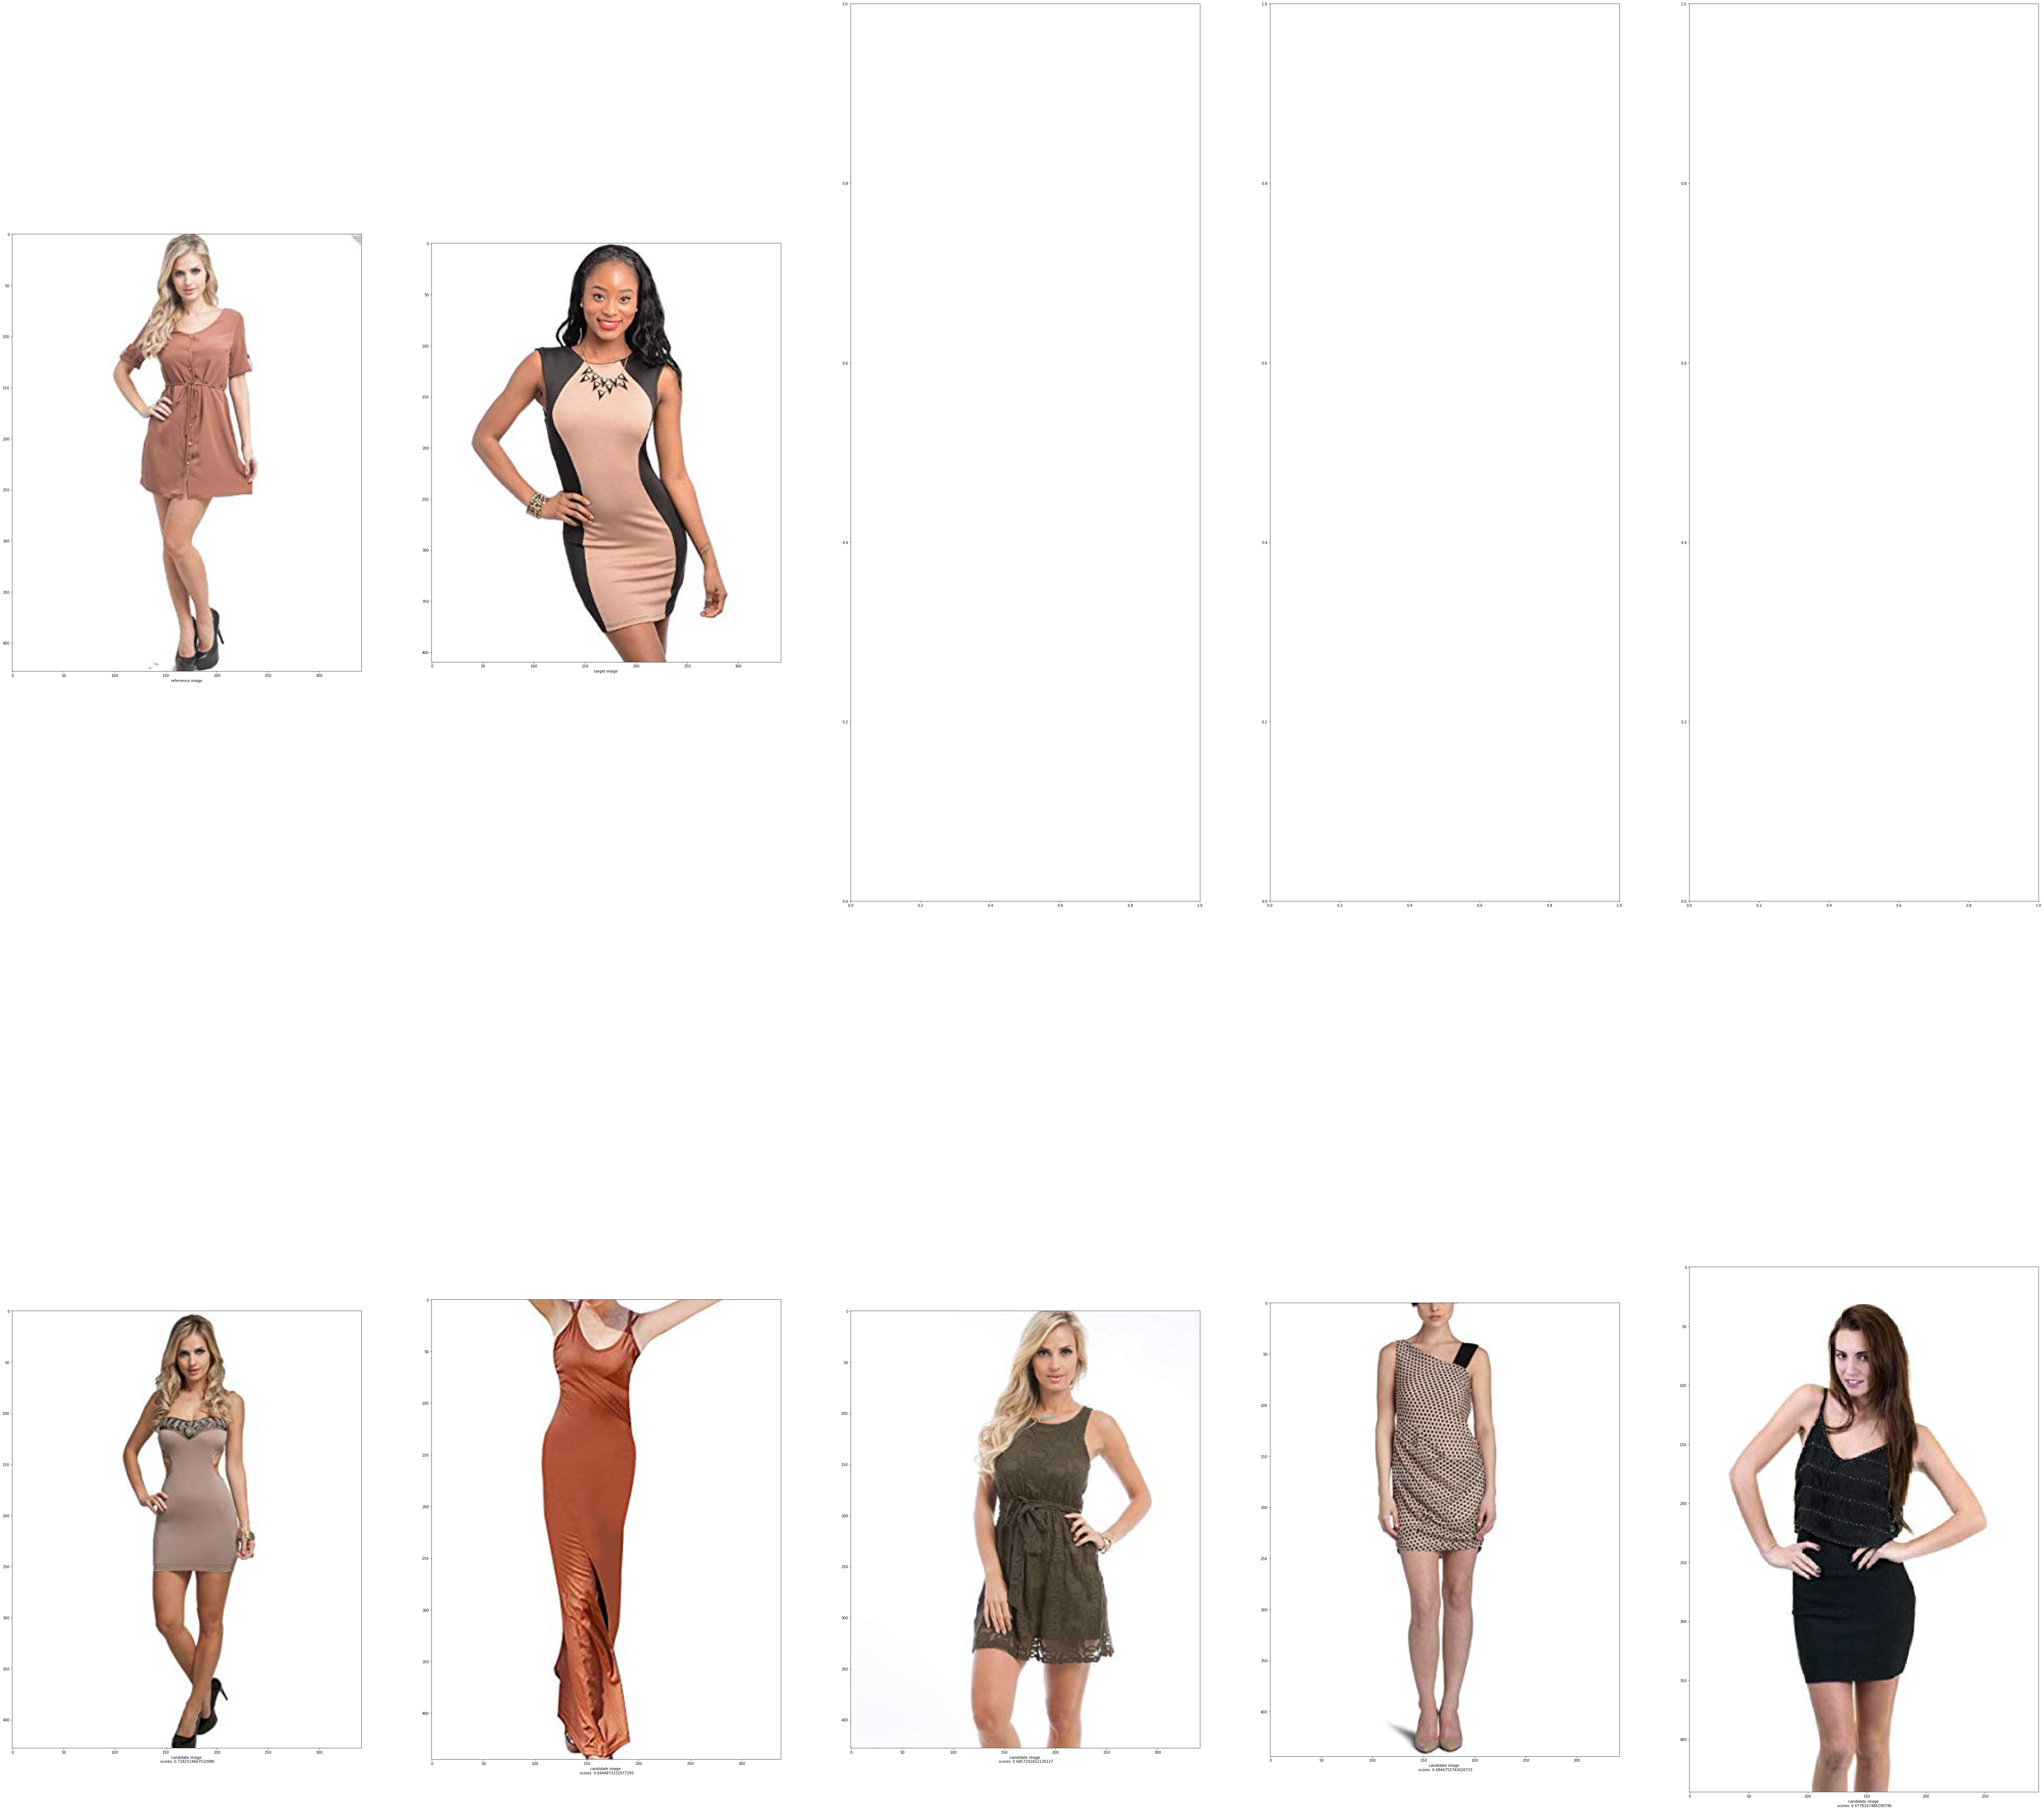

modification text:  has shorter sleeves and is tighter inadditiontothat is sleeveless and fitted


In [82]:
pred = preds[random.randint(0, len(preds))]

for query in val_dataset.test_queries: 
    if query["source_img_id"] == val_dataset.asin2id[pred["candidate"]]: 
        mod_str = query["mod"]["str"]
        tgt_img_id = query["target_img_id"]
tgt_img_asin = val_dataset.id2asin[tgt_img_id]

n_display = 5
pred_display = pred["ranking"][0: n_display]

ref_img_path = os.path.join(val_dataset.img_path, "images", pred["candidate"] + ".jpg")
tgt_img_path = os.path.join(val_dataset.img_path, "images", tgt_img_asin + ".jpg")
candidates_img_path = []
for cand in pred_display:
    candidates_img_path.append(os.path.join(val_dataset.img_path, "images", cand + ".jpg"))
    
fig, axs = plt.subplots(ncols=len(pred_display), nrows=2)

ref_img = mpimg.imread(ref_img_path)
tgt_img = mpimg.imread(tgt_img_path)
cand_imgs = []
for cand in candidates_img_path:
    cand_imgs.append(mpimg.imread(cand))
    
axs[0,0].imshow(ref_img)
axs[0,0].set(xlabel='referrence image')

axs[0,1].imshow(tgt_img)
axs[0,1].set(xlabel='target image')

for i, cand in enumerate(cand_imgs):
    axs[1, i].imshow(cand)
    axs[1, i].set(xlabel='candidate image \n scores: {}'.format(pred["scores"][i]))
    
fig.set_figheight(100)
fig.set_figwidth(100)
    
plt.show()

print("modification text: ", mod_str)

In [ ]:
pred[]